# EDA - Exploratory Data Analysis

In [463]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
plt.style.use('seaborn-bright')
# print(plt.style.available)

In [464]:
# df = pd.read_csv('data/train_processed_1.csv', index_col='id')
df = pd.read_csv('data/train_processed_1.csv')
df.head()

,age_in_yrs,income,application_underwriting_score,premium,perc_premium_paid_by_cash_credit,no_of_premiums_paid,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,sourcing_channel,residence_area_type,renewal
0,33,355060,99.02,3300,0.429,13,0.0,0.0,0.0,C,Urban,1
1,59,315150,99.89,18000,0.010,21,0.0,0.0,0.0,A,Urban,1
2,48,84140,98.69,3300,0.917,7,2.0,3.0,1.0,C,Rural,0
3,42,250510,99.57,9600,0.049,9,0.0,0.0,0.0,A,Urban,1
4,86,198680,99.87,9600,0.052,12,0.0,0.0,0.0,B,Urban,1


## Processing: Income Column

In [465]:
print('Min income',df['income'].min())
print('Max income',df['income'].max())
print(df['income'].describe())

df['income_log'] = df['income'].apply(np.log).round(2)
print('income log sample data:\n',df['income_log'].head())
print('Min income',df['income_log'].min())
print('Max income',df['income_log'].max())
print(df['income_log'].describe())

Min income 24030
Max income 90262600
count    7.985300e+04
mean     2.088472e+05
std      4.965826e+05
min      2.403000e+04
25%      1.080100e+05
50%      1.665600e+05
75%      2.520900e+05
max      9.026260e+07
Name: income, dtype: float64
income log sample data:
 0    12.78
1    12.66
2    11.34
3    12.43
4    12.20
Name: income_log, dtype: float64
Min income 10.09
Max income 18.32
count    79853.000000
mean        12.003769
std          0.660494
min         10.090000
25%         11.590000
50%         12.020000
75%         12.440000
max         18.320000
Name: income_log, dtype: float64


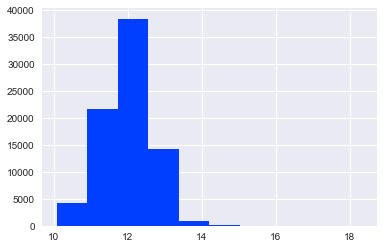

In [466]:
df['income_log'].hist()

In [467]:
df['income'] = df['income_log']
df.drop('income_log',axis=1,inplace=True)
df.head()

,age_in_yrs,income,application_underwriting_score,premium,perc_premium_paid_by_cash_credit,no_of_premiums_paid,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,sourcing_channel,residence_area_type,renewal
0,33,12.78,99.02,3300,0.429,13,0.0,0.0,0.0,C,Urban,1
1,59,12.66,99.89,18000,0.010,21,0.0,0.0,0.0,A,Urban,1
2,48,11.34,98.69,3300,0.917,7,2.0,3.0,1.0,C,Rural,0
3,42,12.43,99.57,9600,0.049,9,0.0,0.0,0.0,A,Urban,1
4,86,12.20,99.87,9600,0.052,12,0.0,0.0,0.0,B,Urban,1


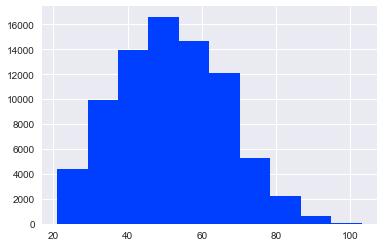

In [468]:
df['age_in_yrs'].hist()

In [469]:
df['age_in_yrs'].describe()

count    79853.000000
mean        51.607404
std         14.270484
min         21.000000
25%         41.000000
50%         51.000000
75%         62.000000
max        103.000000
Name: age_in_yrs, dtype: float64

,age_in_yrs,income,application_underwriting_score,premium,perc_premium_paid_by_cash_credit,no_of_premiums_paid,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,sourcing_channel,residence_area_type,renewal
0,0.146341,12.78,99.02,3300,0.429,13,0.0,0.0,0.0,C,Urban,1
1,0.463415,12.66,99.89,18000,0.010,21,0.0,0.0,0.0,A,Urban,1
2,0.329268,11.34,98.69,3300,0.917,7,2.0,3.0,1.0,C,Rural,0
3,0.256098,12.43,99.57,9600,0.049,9,0.0,0.0,0.0,A,Urban,1
4,0.792683,12.20,99.87,9600,0.052,12,0.0,0.0,0.0,B,Urban,1


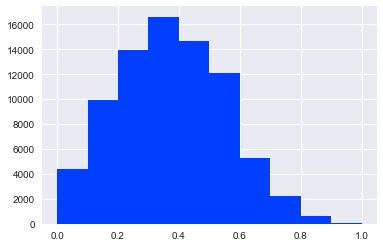

In [470]:
from sklearn import preprocessing
data_scalar = preprocessing.MinMaxScaler()
df['age_in_yrs'] = data_scalar.fit_transform(df[['age_in_yrs']]).flatten()
df['age_in_yrs'].hist()
df.head()

,age_in_yrs,income,application_underwriting_score,premium,perc_premium_paid_by_cash_credit,no_of_premiums_paid,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,sourcing_channel,residence_area_type,renewal
0,0.146,12.78,99.02,3300,0.429,13,0.0,0.0,0.0,C,Urban,1
1,0.463,12.66,99.89,18000,0.010,21,0.0,0.0,0.0,A,Urban,1
2,0.329,11.34,98.69,3300,0.917,7,2.0,3.0,1.0,C,Rural,0
3,0.256,12.43,99.57,9600,0.049,9,0.0,0.0,0.0,A,Urban,1
4,0.793,12.20,99.87,9600,0.052,12,0.0,0.0,0.0,B,Urban,1


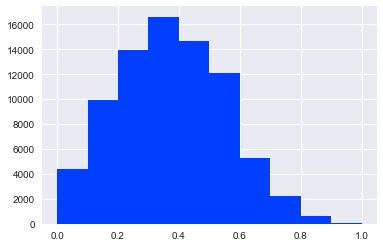

In [471]:
df['age_in_yrs'].round(3).hist() # minmost  value that retains the plot shape
df['age_in_yrs'] = df['age_in_yrs'].round(3)
df.head()

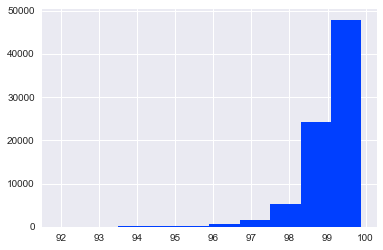

In [472]:
df['application_underwriting_score'].hist()

,age_in_yrs,income,application_underwriting_score,premium,perc_premium_paid_by_cash_credit,no_of_premiums_paid,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,sourcing_channel,residence_area_type,renewal
0,0.146,12.78,0.891,3300,0.429,13,0.0,0.0,0.0,C,Urban,1
1,0.463,12.66,1.000,18000,0.010,21,0.0,0.0,0.0,A,Urban,1
2,0.329,11.34,0.850,3300,0.917,7,2.0,3.0,1.0,C,Rural,0
3,0.256,12.43,0.960,9600,0.049,9,0.0,0.0,0.0,A,Urban,1
4,0.793,12.20,0.997,9600,0.052,12,0.0,0.0,0.0,B,Urban,1


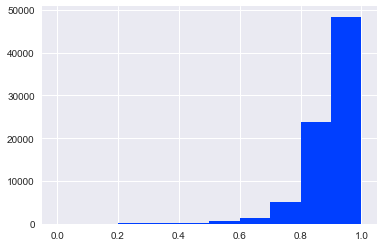

In [473]:
df['application_underwriting_score'] = data_scalar.fit_transform(df[['application_underwriting_score']]).flatten().round(3)
df['application_underwriting_score'].hist()
df.head()

count    79853.000000
mean        10.863887
std          5.170687
min          2.000000
25%          7.000000
50%         10.000000
75%         14.000000
max         60.000000
Name: no_of_premiums_paid, dtype: float64

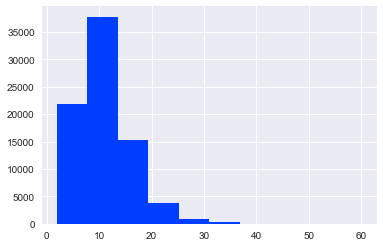

In [474]:
df['no_of_premiums_paid'].hist()
df['no_of_premiums_paid'].describe()

,age_in_yrs,income,application_underwriting_score,premium,perc_premium_paid_by_cash_credit,no_of_premiums_paid,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,sourcing_channel,residence_area_type,renewal
0,0.146,12.78,0.891,3300,0.429,0.19,0.0,0.0,0.0,C,Urban,1
1,0.463,12.66,1.000,18000,0.010,0.33,0.0,0.0,0.0,A,Urban,1
2,0.329,11.34,0.850,3300,0.917,0.09,2.0,3.0,1.0,C,Rural,0
3,0.256,12.43,0.960,9600,0.049,0.12,0.0,0.0,0.0,A,Urban,1
4,0.793,12.20,0.997,9600,0.052,0.17,0.0,0.0,0.0,B,Urban,1


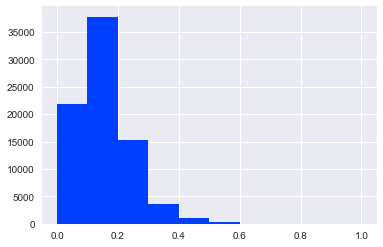

In [475]:
#  tmp = data_scalar.fit_transform(df[['no_of_premiums_paid']]).flatten().round(2)
# pd.Series(tmp).hist()
df['no_of_premiums_paid'] = data_scalar.fit_transform(df[['no_of_premiums_paid']]).flatten().round(2)
df['no_of_premiums_paid'].hist()
df.head()

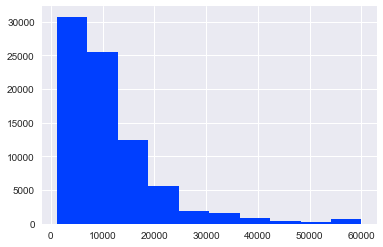

In [476]:
df['premium'].hist()

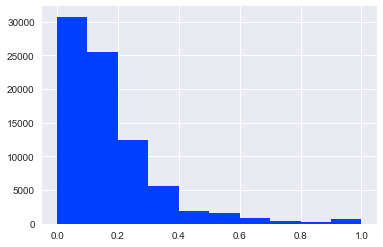

In [477]:
tmp = data_scalar.fit_transform(df[['premium']]).flatten().round(2)
pd.Series(tmp).hist()

,age_in_yrs,income,application_underwriting_score,premium,perc_premium_paid_by_cash_credit,no_of_premiums_paid,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,sourcing_channel,residence_area_type,renewal
0,0.146,12.78,0.891,8.1017,0.429,0.19,0.0,0.0,0.0,C,Urban,1
1,0.463,12.66,1.000,9.7981,0.010,0.33,0.0,0.0,0.0,A,Urban,1
2,0.329,11.34,0.850,8.1017,0.917,0.09,2.0,3.0,1.0,C,Rural,0
3,0.256,12.43,0.960,9.1695,0.049,0.12,0.0,0.0,0.0,A,Urban,1
4,0.793,12.20,0.997,9.1695,0.052,0.17,0.0,0.0,0.0,B,Urban,1


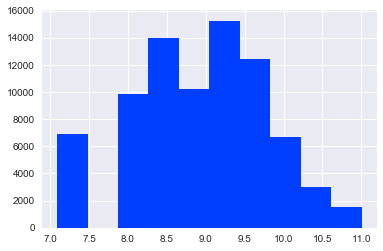

In [478]:
# tmp2 = np.log(df['premium'])
# pd.Series(tmp2).hist()
df['premium'] = df['premium'].apply(np.log).round(4)
df['premium'].hist()
df.head()

In [479]:
# df['age_in_yrs'].plot(kind='box')
# df.boxplot(column='age_in_yrs', vert=False)

In [480]:
# age_bins = [0,40,50,60,80,110]
# df['age_in_yrs'].value_counts(bins=age_bins)

In [481]:
# df['age_in_yrs'].hist(bins=age_bins, rwidth=.90)

In [482]:
# df.hist(column='income')
# df['income'].plot(kind='hist', bins=10)
# df['income'].value_counts(bins=10)

In [483]:
# print( df.no_of_premiums_paid.value_counts().head(5) )
# print( df.no_of_premiums_paid.value_counts().tail(5) )

In [484]:
'''
# Checking if the values in value_counts() are same even after transformation of keys
res1 = df['count_3-6_months_late'].value_counts().values == df['count_3-6_months_late'].apply(np.log).round(2).value_counts().values
res2 = df['count_6-12_months_late'].value_counts().values == df['count_6-12_months_late'].apply(np.log).round(2).value_counts().values
res3 = df['count_more_than_12_months_late'].value_counts().values == df['count_more_than_12_months_late'].apply(np.log).round(2).value_counts().values
print( np.all(res1) )
print( np.all(res2) )
print( np.all(res3) )
# Because all looks good, lets go ahead and transform the  keys
# Yikes!, this doesn't work because we havev -infinity values :(
'''

"\n# Checking if the values in value_counts() are same even after transformation of keys\nres1 = df['count_3-6_months_late'].value_counts().values == df['count_3-6_months_late'].apply(np.log).round(2).value_counts().values\nres2 = df['count_6-12_months_late'].value_counts().values == df['count_6-12_months_late'].apply(np.log).round(2).value_counts().values\nres3 = df['count_more_than_12_months_late'].value_counts().values == df['count_more_than_12_months_late'].apply(np.log).round(2).value_counts().values\nprint( np.all(res1) )\nprint( np.all(res2) )\nprint( np.all(res3) )\n# Because all looks good, lets go ahead and transform the  keys\n# Yikes!, this doesn't work because we havev -infinity values :(\n"

In [485]:
# df['count_3-6_months_late'] = df['count_3-6_months_late'].apply(np.log).round(2)
# df['count_6-12_months_late'] = df['count_6-12_months_late'].apply(np.log).round(2)
# df['count_more_than_12_months_late'] = df['count_more_than_12_months_late'].apply(np.log).round(2)

In [486]:
# Convert values to Percent in Crosstab, that is to be used sooner..
def toPercent(ser):
    s = ser/ser[-1]*100
    return s

In [487]:
# df[['residence_area_type','renewal']].groupby(by=['residence_area_type']).aggregate('mean').unstack()
# df[['residence_area_type','renewal']].groupby(by=['residence_area_type']).aggregate(['mean','sum','count'])
pd.crosstab(df['residence_area_type'], df['renewal'], margins=True)

renewal,0,1,All
residence_area_type,,,
Rural,1998,29672,31670
Urban,3000,45183,48183
All,4998,74855,79853


In [488]:
pd.crosstab(df['residence_area_type'], df['renewal'], margins=True).apply(toPercent, axis=1)

renewal,0,1,All
residence_area_type,,,
Rural,6.308810,93.691190,100.0
Urban,6.226262,93.773738,100.0
All,6.259001,93.740999,100.0


In [489]:
df['sourcing_channel'].value_counts()

A    43134
B    16512
C    12039
D     7559
E      609
Name: sourcing_channel, dtype: int64

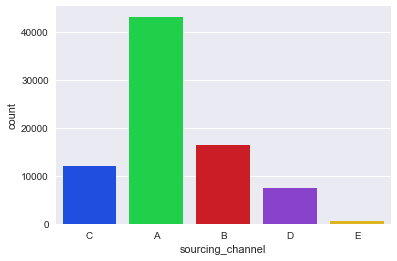

In [490]:
sns.countplot(df['sourcing_channel'], label='Count')

In [491]:
pd.crosstab(df['sourcing_channel'], df['renewal'], margins=True)

renewal,0,1,All
sourcing_channel,,,
A,2349,40785,43134
B,1066,15446,16512
C,903,11136,12039
D,634,6925,7559
E,46,563,609
All,4998,74855,79853


In [492]:
# Basic Collerogram
# sns.pairplot(df, kind='reg')
# plot.show()

In [493]:
# Basic Collerogram
# sns.pairplot(df, kind='scatter', hue='renewal', markers=['o','s'])
# plt.show()

In [494]:
# Feature Category : sourcing_channel, residence_area_type
from sklearn import preprocessing

def categorize(df):
    prefix = df.columns[0]+'_'
    print('prefix :', prefix)
    # Convert string values to numbers in target column
    le = preprocessing.LabelEncoder()
    df1 = df.apply(le.fit_transform)
    new_cols = [prefix+c for c in le.classes_]
    # Split One Column As Many
    enc = preprocessing.OneHotEncoder() # 1. Instantiate
    arr2d = enc.fit_transform(df1).todense() # 2&3. Fit n Transform returns 2d-array as sparse Matrix
    df2  = pd.DataFrame(arr2d, columns=new_cols) # Convert array-Matrix to Pandas' DataFrame
    return df2    

In [495]:
# categorize(df[['sourcing_channel']]).head()
tmp_df = categorize(df[['sourcing_channel']])
df2 = df.join(tmp_df)
df2.head()

prefix : sourcing_channel_


,age_in_yrs,income,application_underwriting_score,premium,perc_premium_paid_by_cash_credit,no_of_premiums_paid,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,sourcing_channel,residence_area_type,renewal,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E
0,0.146,12.78,0.891,8.1017,0.429,0.19,0.0,0.0,0.0,C,Urban,1,0.0,0.0,1.0,0.0,0.0
1,0.463,12.66,1.000,9.7981,0.010,0.33,0.0,0.0,0.0,A,Urban,1,1.0,0.0,0.0,0.0,0.0
2,0.329,11.34,0.850,8.1017,0.917,0.09,2.0,3.0,1.0,C,Rural,0,0.0,0.0,1.0,0.0,0.0
3,0.256,12.43,0.960,9.1695,0.049,0.12,0.0,0.0,0.0,A,Urban,1,1.0,0.0,0.0,0.0,0.0
4,0.793,12.20,0.997,9.1695,0.052,0.17,0.0,0.0,0.0,B,Urban,1,0.0,1.0,0.0,0.0,0.0


In [496]:
tmp_df = categorize(df[['residence_area_type']])
df3 = df2.join(tmp_df)
df3.head()
# Pipeline
# Prediction

prefix : residence_area_type_


,age_in_yrs,income,application_underwriting_score,premium,perc_premium_paid_by_cash_credit,no_of_premiums_paid,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,sourcing_channel,residence_area_type,renewal,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban
0,0.146,12.78,0.891,8.1017,0.429,0.19,0.0,0.0,0.0,C,Urban,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.463,12.66,1.000,9.7981,0.010,0.33,0.0,0.0,0.0,A,Urban,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.329,11.34,0.850,8.1017,0.917,0.09,2.0,3.0,1.0,C,Rural,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.256,12.43,0.960,9.1695,0.049,0.12,0.0,0.0,0.0,A,Urban,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.793,12.20,0.997,9.1695,0.052,0.17,0.0,0.0,0.0,B,Urban,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [497]:
df4 = df3.drop(['sourcing_channel', 'residence_area_type'], axis=1)
df4.head()

,age_in_yrs,income,application_underwriting_score,premium,perc_premium_paid_by_cash_credit,no_of_premiums_paid,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,renewal,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban
0,0.146,12.78,0.891,8.1017,0.429,0.19,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.463,12.66,1.000,9.7981,0.010,0.33,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.329,11.34,0.850,8.1017,0.917,0.09,2.0,3.0,1.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.256,12.43,0.960,9.1695,0.049,0.12,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.793,12.20,0.997,9.1695,0.052,0.17,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [498]:
df4.columns

Index(['age_in_yrs', 'income', 'application_underwriting_score', 'premium',
       'perc_premium_paid_by_cash_credit', 'no_of_premiums_paid',
       'count_3-6_months_late', 'count_6-12_months_late',
       'count_more_than_12_months_late', 'renewal', 'sourcing_channel_A',
       'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D',
       'sourcing_channel_E', 'residence_area_type_Rural',
       'residence_area_type_Urban'],
      dtype='object')

In [499]:
df4.columns = ['age_in_yrs', 
               'income', 
               'application_underwriting_score', 
               'premium',
               'perc_premium_paid_by_cash_credit', 
               'no_of_premiums_paid',
               'count_3-6_months_late', 'count_6-12_months_late', 'count_more_than_12_months_late', 
               'sourcing_channel_A', 'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D', 'sourcing_channel_E', 
               'residence_area_type_Rural', 'residence_area_type_Urban',
               'renewal']
df4.head()

,age_in_yrs,income,application_underwriting_score,premium,perc_premium_paid_by_cash_credit,no_of_premiums_paid,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban,renewal
0,0.146,12.78,0.891,8.1017,0.429,0.19,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.463,12.66,1.000,9.7981,0.010,0.33,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.329,11.34,0.850,8.1017,0.917,0.09,2.0,3.0,1.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.256,12.43,0.960,9.1695,0.049,0.12,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.793,12.20,0.997,9.1695,0.052,0.17,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Split Test Data into Train and CV

In [500]:
x = df4.iloc[:,:-1]
y = df4.iloc[:,-1].astype(int)
print(x.shape)
print(y.shape)

(79853, 16)
(79853,)


In [501]:
# from sklearn.model_selection import train_test_split
trainx,cvx, trainy,cvy = train_test_split(x,y, test_size=0.1, random_state=42, stratify=y)

# After we randomly split the dataset, we've the following class proportions in percent: 
print('All:', np.bincount(y) / len(y) * 100.0)
print('Training:', np.bincount(trainy) / len(trainy) * 100.0)
print('Test:', np.bincount(cvy) / len(cvy) * 100.0)

All: [39.66037594 60.33962406]
Training: [39.66076224 60.33923776]
Test: [39.65689957 60.34310043]


## Modeling: Logistic Regression

In [502]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(trainx,trainy)
print('Classification Score on trainx/y :', clf.score(trainx, trainy)) # Perfect score  1
print('Classification Score on trainx/y :', clf.score(cvx, cvy)) # Perfect score  1

Classification Score on trainx/y : 1.0
Classification Score on trainx/y : 1.0


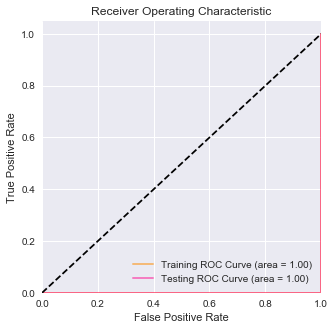

In [503]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Get just the probability of class in 0th-column and that implies getting the probability of "Not Renewing the Policy"
# Get just the probability of class in 1st-column and that implies getting the probability of "Renewing the Policy"
trainy_prob = clf.predict_proba(trainx)[:,0]
# print(trainy.shape)
# print('trainy_prob :', trainy_prob)
fpr, tpr, thresholds = roc_curve(trainy, trainy_prob, pos_label=1)
# print("fpr:{0}, tpr:{1}, threshold:{2}".format(fpr,tpr,thresholds))
roc_auc = auc(1-fpr, 1-tpr) # Because we want the P(renewing the policy) when we know the P(NOT renewing the policy)

cvy_prob = clf.predict_proba(cvx)[:,0] # Get just the probability of class in first-column
fpr_cv, tpr_cv, threshold_cv = roc_curve(cvy, cvy_prob, pos_label=1)
roc_auc_cv = auc(1-fpr_cv, 1-tpr_cv)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', alpha=0.5, lw=2, linestyle='-', label='Training ROC Curve (area = {0:.2f})'.format(roc_auc))
plt.plot(fpr_cv, tpr_cv, color='deeppink', alpha=0.5, lw=2, linestyle='-', label='Testing ROC Curve (area = {0:.2f})'.format(roc_auc_cv))
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Preliminary Pre-processing of TEST dataset


In [504]:
newdf = pd.read_csv('data/test.csv')
newdf.shape

(34224, 12)

In [505]:
newdf.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600


In [506]:
newdf = newdf.rename(columns={'Income':'income',
                   'Count_3-6_months_late':'count_3-6_months_late', 
                   'Count_6-12_months_late':'count_6-12_months_late',
                   'Count_more_than_12_months_late':'count_more_than_12_months_late'
                  })
newdf.head(5)

,id,perc_premium_paid_by_cash_credit,age_in_days,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600


In [507]:
# newdf.drop(columns=['id'],axis=1,inplace=True) # Don't because it is requirerd for final submimssion
# newdf.head()
iddf = newdf['id']
print(iddf.shape)
newdf = newdf.iloc[:,1:]
newdf.head()

(34224,)


,perc_premium_paid_by_cash_credit,age_in_days,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium
0,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300
1,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700
2,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700
3,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400
4,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600


In [508]:
newdf['age_in_yrs'] = (newdf['age_in_days'] / 365).astype(int)
newdf.drop(columns=['age_in_days'],axis=1, inplace=True)
newdf.head()

,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,age_in_yrs
0,0.001,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300,75
1,0.124,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700,65
2,1.000,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700,47
3,0.198,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400,44
4,0.041,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600,29


In [509]:
print(newdf.isnull().sum())
tmp = newdf[['count_3-6_months_late', 'count_6-12_months_late', 'count_more_than_12_months_late']].fillna(0)
newdf.update(tmp)
print(newdf.isnull().sum())

perc_premium_paid_by_cash_credit       0
income                                 0
count_3-6_months_late                 31
count_6-12_months_late                31
count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
age_in_yrs                             0
dtype: int64
perc_premium_paid_by_cash_credit       0
income                                 0
count_3-6_months_late                  0
count_6-12_months_late                 0
count_more_than_12_months_late         0
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
age_in_yrs                             0
dtype: int64


In [510]:
newdf.update( newdf['application_underwriting_score'].fillna(99.89) ) # Filling with mode value of test set
newdf.isnull().sum()

perc_premium_paid_by_cash_credit    0
income                              0
count_3-6_months_late               0
count_6-12_months_late              0
count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
age_in_yrs                          0
dtype: int64

## More Pre-processing of TEST dataset


In [511]:
newdf['income'] = newdf['income'].apply(np.log).round(2)

In [512]:
from sklearn import preprocessing
data_scalar = preprocessing.MinMaxScaler()

newdf['age_in_yrs'] = data_scalar.fit_transform(newdf[['age_in_yrs']]).flatten().round(3)
newdf['application_underwriting_score'] = data_scalar.fit_transform(newdf[['application_underwriting_score']]).flatten().round(3)
newdf['no_of_premiums_paid'] = data_scalar.fit_transform(newdf[['no_of_premiums_paid']]).flatten().round(2)
newdf['premium'] = newdf['premium'].apply(np.log).round(4)

In [513]:
tmp_df = categorize(newdf[['sourcing_channel']])
newdf = df.join(tmp_df)

tmp_df = categorize(newdf[['residence_area_type']])
newdf = df2.join(tmp_df)

newdf.drop(['sourcing_channel', 'residence_area_type'], axis=1, inplace=True)

prefix : sourcing_channel_
prefix : residence_area_type_


In [514]:
newdf.columns = ['age_in_yrs', 
               'income', 
               'application_underwriting_score', 
               'premium',
               'perc_premium_paid_by_cash_credit', 
               'no_of_premiums_paid',
               'count_3-6_months_late', 'count_6-12_months_late', 'count_more_than_12_months_late', 
               'sourcing_channel_A', 'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D', 'sourcing_channel_E', 
               'residence_area_type_Rural', 'residence_area_type_Urban',
               'renewal']

In [515]:
newdf.head()

,age_in_yrs,income,application_underwriting_score,premium,perc_premium_paid_by_cash_credit,no_of_premiums_paid,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban,renewal
0,0.146,12.78,0.891,8.1017,0.429,0.19,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.463,12.66,1.000,9.7981,0.010,0.33,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.329,11.34,0.850,8.1017,0.917,0.09,2.0,3.0,1.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.256,12.43,0.960,9.1695,0.049,0.12,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.793,12.20,0.997,9.1695,0.052,0.17,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [516]:
testx = df4.iloc[:,:-1]
testy = df4.iloc[:,-1].astype(int)
print(testx.shape)
print(testy.shape)

(79853, 16)
(79853,)


## Part A

The base probability of receiving a premium on a policy without considering any incentive.

The probabilities predicted by the participants would be evaluated using AUC ROC score.

## Summary
Following pre-procecssing activities are done as part of this deliverable/notebook:
1. Preprocess by applying np.log on the following columns:
    1.1 income
    1.2 premium
2. Pre-process with MinMaxScalara() the following columns: 
    2.1 age_in_yrs, 
    2.2 application_underwriting_score
    2.3 no_of_premiums_paid
3. Pre-process Feature Categories with LabelEncoder and OneHotEncoder on the following columns: 
    3.1 sourcing_channel, 
    3.2 residence_area_type

In [520]:
testy_prob = clf.predict_proba(testx)[:,1] # Get just the probability of renewal (class in 1st-column)
fpr_test, tpr_test, threshold_test = roc_curve(testy, testy_prob, pos_label=1)
roc_auc_test = auc(fpr_test, tpr_test)
print('roc_auc_test', roc_auc_test)
print('threshold_test', threshold_test)

roc_auc_test 1.0
threshold_test [9.99985444e-01 9.99245007e-01 9.99244854e-01 9.99199729e-01
 9.99199408e-01 9.99172286e-01 9.99172266e-01 9.99116263e-01
 9.99116218e-01 9.99080554e-01 9.99080488e-01 9.99048947e-01
 9.99048895e-01 9.99005239e-01 9.99005215e-01 9.98990502e-01
 9.98990081e-01 9.98944165e-01 9.98943182e-01 9.98937868e-01
 9.98937842e-01 9.98397598e-01 2.73503839e-04 2.73488870e-04
 2.12314230e-04 2.12309049e-04 1.88641680e-04 1.88602116e-04
 1.29271728e-04]


In [517]:
testy_prob = clf.predict_proba(testx)[:,0] # Get just the probability of No-renewal (class in 0th-column)
fpr_test, tpr_test, threshold_test = roc_curve(testy, testy_prob, pos_label=1)
roc_auc_test = auc(1-fpr_test, 1-tpr_test)
print('roc_auc_test', roc_auc_test)
print('threshold_test', threshold_test)

roc_auc_test 1.0
threshold_test [1.99987073e+00 9.99870728e-01 9.99811526e-01 9.99811398e-01
 9.99787700e-01 9.99787691e-01 9.99726529e-01 9.99726511e-01
 9.90776901e-01 1.06218901e-03 1.06215829e-03 1.05684347e-03
 1.05681770e-03 1.01016021e-03 1.00991894e-03 9.94809295e-04
 9.94785039e-04 9.51458825e-04 9.51104667e-04 9.19642342e-04
 9.19512292e-04 8.83924150e-04 8.83782212e-04 8.27973210e-04
 8.27734261e-04 8.00634046e-04 8.00591645e-04 7.55183012e-04
 7.55146177e-04 1.45561481e-05]


In [518]:
finaldf = pd.concat([iddf.to_frame(),
                     pd.DataFrame(testy_prob, columns=['renewal'])
                    ],
                    axis=1)
finaldf.head()

,id,renewal
0,649.0,0.000285
1,81136.0,0.000230
2,70762.0,0.999643
3,53935.0,0.000271
4,15476.0,0.000347


## Part  B

The monthly incentives you will provide on each policy to maximize the net revenue based on the provided formulae in the problem statement

In [522]:
# ??